### BFS路线搜索

In [1]:
connection={
    1: [2, 3, 4],
    2: [1, 5, 6],
    3: [1, 4, 5],
    4: [1, 3],
    5: [2, 3],
    6: [2]
}

In [3]:
import networkx as nx

In [4]:
%matplotlib inline

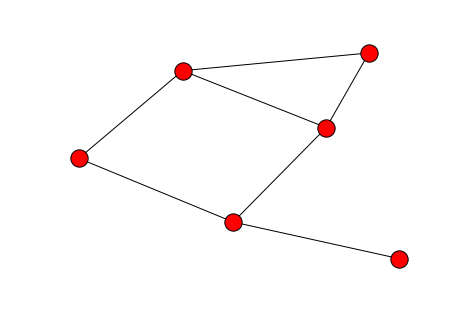

In [13]:
graph=nx.Graph(connection)
nx.draw(graph)

In [19]:
def bfs(start,connection):
    pathes = [start]
    seen = set()
    
    while pathes:
        pos = pathes.pop(0)
        
        if pos in seen: continue
            
        successor = connection[pos]
        print(pos,'->',successor)
        pathes = pathes + successor
        
        seen.add(pos)

In [20]:
bfs(1,connection)

1 -> [2, 3, 4]
2 -> [1, 5, 6]
3 -> [1, 4, 5]
4 -> [1, 3]
5 -> [2, 3]
6 -> [2]


### 文本自动生成

In [29]:
grammar='''
color = brand No
No = number number number 
number = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
brand = YSL圆管 | YSL方管 | GA红管 | GA黑管 | chanel
'''

In [48]:
def parse_grammar(grammar_str):
    grammar = {}
    
    lines = grammar_str.split('\n')
    
    for line in lines:
        line = line.strip()
        if line=='': continue
            
        target, components = line.split('=')
        
        components=components.split('|')
        
        grammar[target.strip()]=[component.split() for component in components]
    
    return grammar

In [49]:
grammar_p = parse_grammar(grammar)
grammar_p

{'No': [['number', 'number', 'number']],
 'brand': [['YSL圆管'], ['YSL方管'], ['GA红管'], ['GA黑管'], ['chanel']],
 'color': [['brand', 'No']],
 'number': [['0'],
  ['1'],
  ['2'],
  ['3'],
  ['4'],
  ['5'],
  ['6'],
  ['7'],
  ['8'],
  ['9']]}

In [50]:
import random

In [51]:
def generator(grammar,target='color'):
    if target not in grammar: return target
    
    rule = random.choice(grammar[target])
    return ''.join(generator(grammar,r) for r in rule)    

In [52]:
generator(grammar_p)

'YSL圆管333'